In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import napari
import colorcet as cc

from dnt import load_spots_data
from dnt import palettes, set_plot_style

spots_directory = Path(r"D:\Tracking\DrosophilaNucleusTracking\data\spots")
save_path = Path(r"D:\Tracking\DrosophilaNucleusTracking\figures\output")

set_plot_style()
spot_dfs, metadatas, stems = load_spots_data(spots_directory)

['lightsheet_20241104_spots', 'lightsheet_20250131_spots', 'lightsheet_20250206_spots', 'lightsheet_20250414_spots', 'lightsheet_20250625_spots', 'lightsheet_20250627_spots', 'lightsheet_20250702_spots', 'lightsheet_20250704_spots', 'lightsheet_20250705_spots', 'lightsheet_trk_20250318_spots', 'lightsheet_trk_20250319a_spots', 'lightsheet_trk_20250319b_spots', 'lightsheet_trk_20250321_spots', 'lightsheet_trk_20250325_spots']


reading spots dfs: 14it [00:12,  1.12it/s]


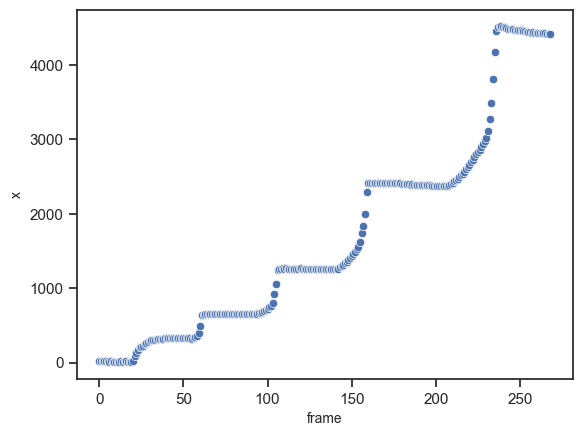

Index(['time_since_nc11', 'z', 'y', 'x', 'AP', 'theta', 'area', 'radius',
       'intensity_mean', 'cycle', 'display_z', 'display_y', 'display_x',
       'px_z', 'px_y', 'px_x', 'px_area', 'uv_v', 'uv_u', 'uv_z',
       'uv_distance_from_edge', 'distance_from_surface', 'uv_area',
       'area_distortion', 'mesh_name', 'interpolated', 'track_id',
       'tracklet_id', 'parent_id', 'n_children', 'n_parents', 'AP_raw',
       'AP_um', 'AP_um_centered', 'um_from_anterior', 'um_from_posterior',
       'distance_to_pole', 'time', 'trk', 'problematic', 'frame',
       'trackmate_id', 'source', 'pseudotime', 'distance', 'cycle_pseudotime',
       'status'],
      dtype='object')


In [7]:
df = spot_dfs[2]

sns.scatterplot(df.groupby("frame")["x"].count())
plt.show()
print(df.columns)

In [ ]:
unhealthy_dfs = [5]

In [4]:
df = spot_dfs[2]

df["status"] = 0
df["status"] += df["n_children"] == 0
df["status"] += (df["n_parents"] == 0)*2

viewer = napari.Viewer(ndisplay=3)

s_df = df[df["status"] > 0].copy()
X = df[["frame", "display_x", "display_y", "display_z"]].values

pal = ["gray", "red", "green", "blue"]

color = [pal[int(tid) % 100] for tid in df["status"]]
size = df["radius"] * 2.5


points = viewer.add_points(
    X, face_color=color, size=size
)

napari.run()